# Home Loan Defaulter Prediction

## Domain
Banking

## Problem Statement
Financial institutions face significant risk when approving home loans due to customer defaults.
The objective of this project is to analyze customer data and build a machine learning model to
predict whether an applicant is likely to default on a home loan.

## Objectives
1. Perform detailed Exploratory Data Analysis (EDA) on the given datasets.
2. Identify key factors affecting loan default.
3. Build predictive models to classify customers as defaulters or non-defaulters.
4. Compare multiple machine learning models and recommend the best one for production use.

## Target Variable
- **TARGET = 1** → Defaulter  
- **TARGET = 0** → Non-Defaulter


## Dataset Description

The dataset consists of multiple CSV files containing historical loan and customer information.

### application_train.csv
Main dataset containing customer loan applications and the target variable.

### bureau.csv
Contains previous credit history of customers from other financial institutions.

### bureau_balance.csv
Monthly status of previous credits from the credit bureau.

### previous_application.csv
Information about previous loan applications made by customers.

### POS_CASH_balance.csv
Monthly balance snapshots of POS and cash loans.

### credit_card_balance.csv
Monthly balance data of customers' credit cards.

### installments_payments.csv
Payment history of previous loans.


## Business Understanding

Loan default prediction helps banks minimize financial losses by identifying risky customers
before loan approval. By analyzing historical loan, payment, and credit behavior, this project
aims to assist financial institutions in making data-driven lending decisions.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")


In [2]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",4)

In [3]:
app_df=pd.read_csv(r"C:\Users\gopag\Downloads\Home_Loan_project_ML_DS\data\application_train.csv")
app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [4]:
print("shape of dataset",app_df.shape)

shape of dataset (307511, 122)


In [5]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [6]:
app_df["TARGET"].value_counts()

TARGET
0    282686
1     24825
Name: count, dtype: int64

In [7]:
app_df["TARGET"].value_counts(normalize=True)*100

TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64

The target variable shows a significant class imbalance, with approximately 92% non-defaulters
and only 8% defaulters. This imbalance may affect model performance and requires special handling
during model training and evaluation.


In [8]:
bureau_balance_df = pd.read_csv(r"C:\Users\gopag\Downloads\Home_Loan_project_ML_DS\data\bureau_balance.csv")
bureau_df = pd.read_csv(r"C:\Users\gopag\Downloads\Home_Loan_project_ML_DS\data\bureau.csv")
credit_card_df = pd.read_csv(r"C:\Users\gopag\Downloads\Home_Loan_project_ML_DS\data\credit_card_balance.csv")
previous_app_df = pd.read_csv(r"C:\Users\gopag\Downloads\Home_Loan_project_ML_DS\data\previous_application.csv")
pos_cash_df = pd.read_csv(r"C:\Users\gopag\Downloads\Home_Loan_project_ML_DS\data\POS_CASH_balance.csv")
installments_df = pd.read_csv(r"C:\Users\gopag\Downloads\Home_Loan_project_ML_DS\data\installments_payments.csv")

In [9]:
print("bureau_balance:",bureau_balance_df.shape)
print("bureau:",bureau_df.shape)
print("credit_card:",credit_card_df.shape)
print("previous_app:",previous_app_df.shape)
print("pos_cash:",pos_cash_df.shape)
print("installments:",installments_df.shape)

bureau_balance: (27299925, 3)
bureau: (1716428, 17)
credit_card: (3840312, 23)
previous_app: (1670214, 37)
pos_cash: (10001358, 8)
installments: (13605401, 8)


## Why Aggregation Is Required

Auxiliary datasets contain multiple rows per customer.
Direct merging would create duplicate records.
Therefore, data aggregation (groupby) will be performed to convert
these datasets into customer-level features before merging.


In [10]:
print("SK_ID_CURR in bureau:","SK_ID_CURR" in bureau_df.columns)
print("SK_ID_BUREAU in bureau_balance:","SK_ID_BUREAU" in bureau_balance_df.columns)
print("SK_ID_CURR in credit_card:","SK_ID_CURR" in credit_card_df.columns)
print("SK_ID_CURR in previous_app","SK_ID_CURR" in previous_app_df.columns)
print("SK_ID_CURR in pos_cash","SK_ID_CURR" in pos_cash_df.columns)
print("SK_ID_CURR in installments","SK_ID_CURR" in installments_df.columns)

SK_ID_CURR in bureau: True
SK_ID_BUREAU in bureau_balance: True
SK_ID_CURR in credit_card: True
SK_ID_CURR in previous_app True
SK_ID_CURR in pos_cash True
SK_ID_CURR in installments True


## Exploratory Data Analysis (EDA)

In this section, we analyze the target variable and key features
to understand customer behavior and loan default patterns.


In [11]:
target_count=app_df["TARGET"].value_counts()
target_percent=app_df["TARGET"].value_counts(normalize=True)*100
print("target_count",target_count)
print("target_percent",target_percent)

target_count TARGET
0    282686
1     24825
Name: count, dtype: int64
target_percent TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64


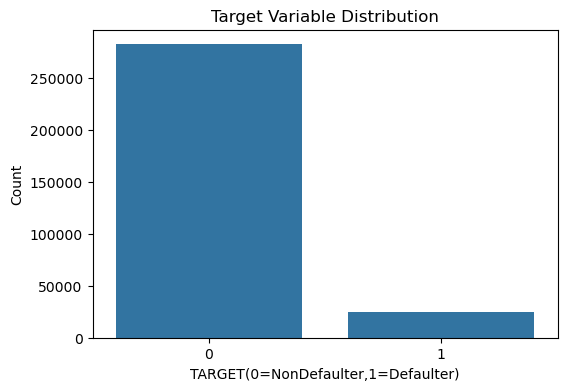

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(x="TARGET",data=app_df)
plt.title("Target Variable Distribution")
plt.xlabel("TARGET(0=NonDefaulter,1=Defaulter)")
plt.ylabel("Count")
plt.show()

### Analysis of Income Distribution


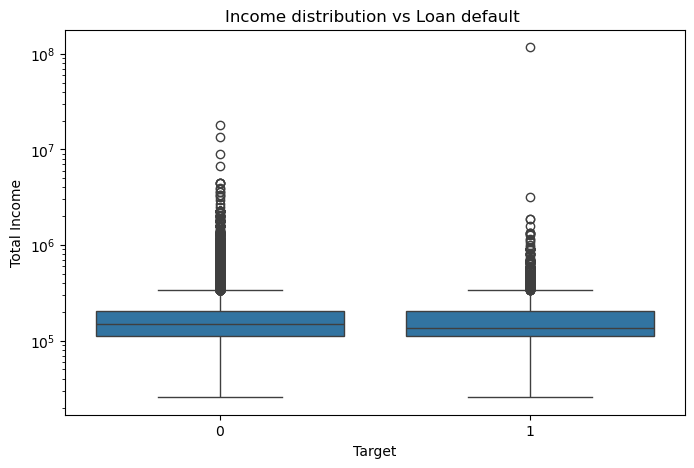

In [13]:
plt.figure(figsize=(8,5))
sns.boxplot(x="TARGET",y="AMT_INCOME_TOTAL",data=app_df)
plt.yscale("log")
plt.title("Income distribution vs Loan default ")
plt.xlabel("Target")
plt.ylabel("Total Income")
plt.show()

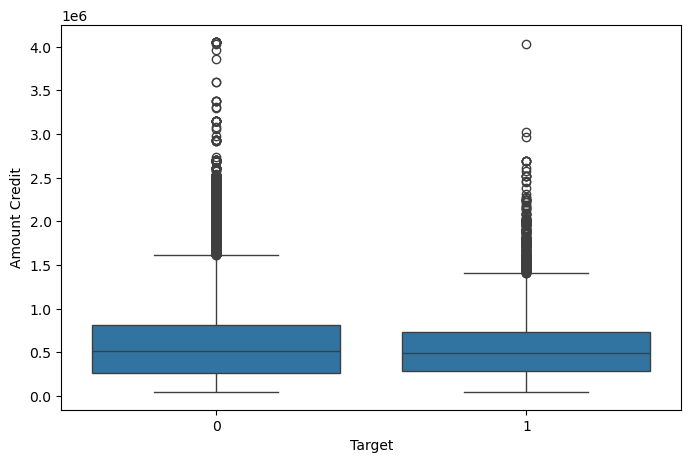

In [14]:
plt.figure(figsize=(8,5))
sns.boxplot(x="TARGET",y="AMT_CREDIT",data=app_df)
plt.xlabel("Target")
plt.ylabel("Amount Credit")
#plt.yscale("log")
plt.show()

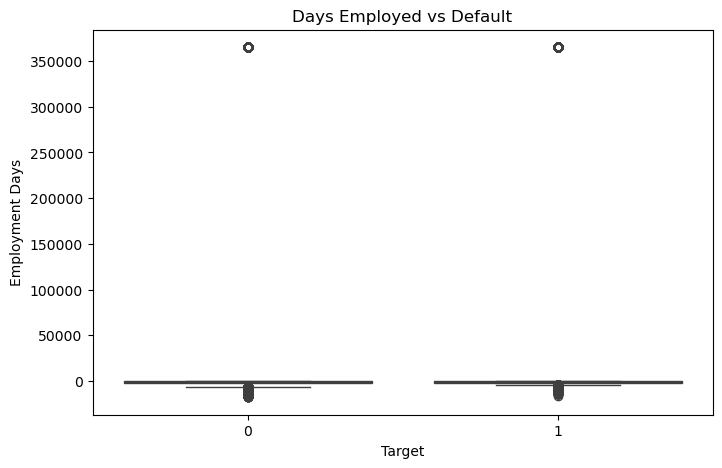

In [15]:
plt.figure(figsize=(8,5))
sns.boxplot(x="TARGET",y="DAYS_EMPLOYED",data=app_df)
plt.xlabel("Target")
plt.ylabel("Employment Days")
plt.title("Days Employed vs Default")
plt.show()

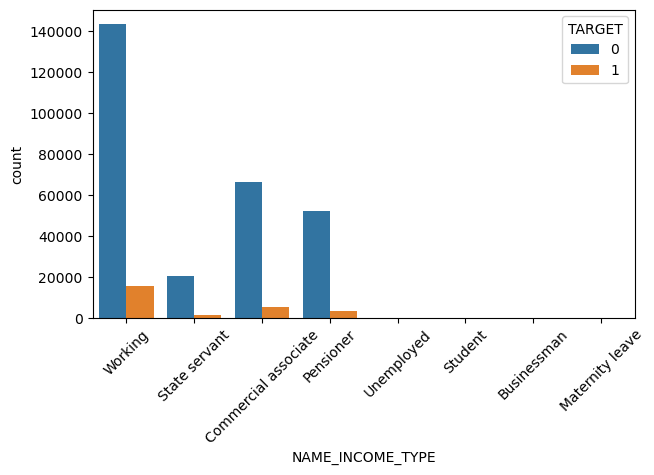

In [16]:
plt.figure(figsize=(7,4))
sns.countplot(x='NAME_INCOME_TYPE', hue='TARGET', data=app_df)
plt.xticks(rotation=45)
# plt.title('Income Type vs Loan Default')
plt.show()


## Key EDA Observations

1. The dataset is highly imbalanced with a majority of non-defaulters.
2. Customers with lower income tend to have a higher probability of default.
3. Higher loan amounts show increased default risk.
4. Employment duration influences repayment capability.
5. Certain income types show higher default rates.


## Feature Engineering and Data Preprocessing


In [17]:
# Checking missing values percent
missing_percent=app_df.isnull().mean()*100
missing_percent.sort_values(ascending=False).head(20)

COMMONAREA_AVG     69.872297
COMMONAREA_MODE    69.872297
                     ...    
LANDAREA_AVG       59.376738
LANDAREA_MODE      59.376738
Length: 20, dtype: float64

In [18]:
high_missing_cols=missing_percent[missing_percent>60].index
app_df.drop(columns=high_missing_cols,inplace=True)
print("droped columns count",len(high_missing_cols))

droped columns count 17


In [19]:
#seperating  numerical and categorical columns
num_col=app_df.select_dtypes(include=["int","float"]).columns
cat_col=app_df.select_dtypes(include=["object"]).columns
print("Numerical Columns",len(num_col))
print("Categorical Cloumns",len(cat_col))

Numerical Columns 90
Categorical Cloumns 15


In [20]:
# Filling missing values with median and mode
for col in num_col:
    app_df[col].fillna(app_df[col].median(),inplace=True)
for col in cat_col:
    app_df[col].fillna(app_df[col].mode(),inplace=True)

In [21]:
#one hot encoding for categorical variable
app_df=pd.get_dummies(app_df,columns=cat_col,drop_first=True)

In [22]:
# Seperate Feature and Target
x=app_df.drop("TARGET",axis=1)
y=app_df["TARGET"]
print("Feature Matrix Shape",x.shape)
print("Target Shape",y.shape)

Feature Matrix Shape (307511, 210)
Target Shape (307511,)


In [23]:
# random_state=42  Ensures the same data split every time
# stratify=y  Preserves class distribution in train and test sets
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)
print("X_train shape",x_train.shape)
print("X_test shape",x_test.shape)

X_train shape (246008, 210)
X_test shape (61503, 210)


In [24]:
# importing logistic regression which is best for simple classification problems like (0 or 1)
# importing metrices for model evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score

In [25]:
# creating logestic regression model
log_model=LogisticRegression(max_iter=1000,
                             random_state=42,
                             class_weight="balanced")

In [26]:
# training model
log_model.fit(x_train,y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [27]:
#predicting by testing and the corresponding defaultness projability of that person
y_pred=log_model.predict(x_test)
y_prob=log_model.predict_proba(x_test)[:,1]

In [28]:
#printing predictions
print(y_pred)
print(y_prob)

[1 1 0 ... 1 0 1]
[0.53529218 0.51080451 0.49444773 ... 0.56225088 0.40678183 0.63766642]


In [29]:
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Classification Report:",classification_report(y_test,y_pred))

Accuracy: 0.5917272328179113
Classification Report:               precision    recall  f1-score   support

           0       0.94      0.59      0.73     56538
           1       0.11      0.57      0.18      4965

    accuracy                           0.59     61503
   macro avg       0.53      0.58      0.46     61503
weighted avg       0.87      0.59      0.68     61503



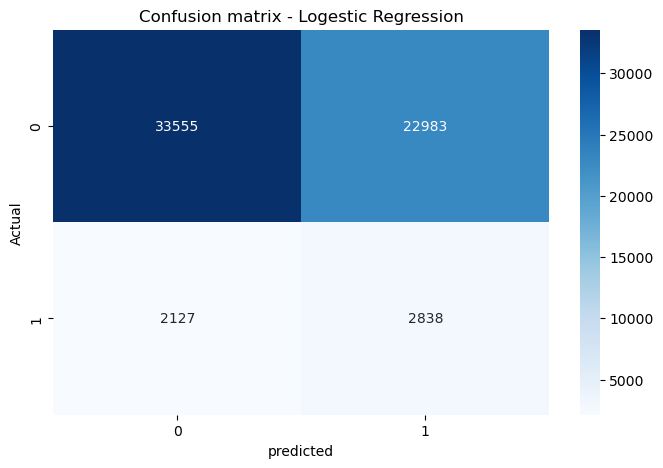

In [30]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues")
plt.xlabel("predicted")
plt.ylabel("Actual")
plt.title("Confusion matrix - Logestic Regression")
plt.show()

In [31]:
# log_auc_score is mostly pred=fered for banking problems.
#we got it as 61% that means 61 times of total 100 model is predicting correct which is slightly better than random
log_auc=roc_auc_score(y_test,y_prob)
print("ROC AUC score:",log_auc)

ROC AUC score: 0.61372685312095


## Logistic Regression Model Performance

- Logistic Regression was used as a baseline model.
- Class imbalance was handled using balanced class weights.
- The model performance was evaluated using accuracy, recall, F1-score, and ROC-AUC.
- ROC-AUC is considered the primary metric for banking risk models.


## Crearing New model----Random Forest

In [32]:
from sklearn.ensemble import RandomForestClassifier

In [33]:
rf_model=RandomForestClassifier(n_estimators=100,
                               max_depth=15,
                               random_state=42,
                               class_weight="balanced",
                               n_jobs=-1)

In [34]:
rf_model.fit(x_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=15, n_jobs=-1,
                       random_state=42)

In [35]:
rf_pred=rf_model.predict(x_test)
rf_prob=rf_model.predict_proba(x_test)[:,1]

In [36]:
print("y_pred :",rf_pred)
print("y_prob:",rf_prob)

y_pred : [0 0 0 ... 0 1 1]
y_prob: [0.35609572 0.29650748 0.47162708 ... 0.4019127  0.58250662 0.57252118]


In [37]:
print("Accuracy:",accuracy_score(y_test,rf_pred))
print("Classification report:",classification_report(y_test,y_pred))

Accuracy: 0.8034567419475472
Classification report:               precision    recall  f1-score   support

           0       0.94      0.59      0.73     56538
           1       0.11      0.57      0.18      4965

    accuracy                           0.59     61503
   macro avg       0.53      0.58      0.46     61503
weighted avg       0.87      0.59      0.68     61503



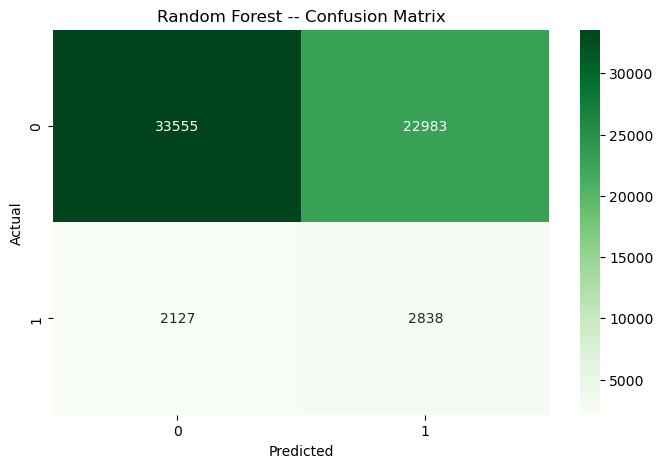

In [38]:
rf_cm=confusion_matrix(y_test,rf_pred)
plt.figure(figsize=(8,5))
sns.heatmap(cm,annot=True,fmt="d",cmap="Greens")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest -- Confusion Matrix")
plt.show()


In [39]:
rf_auc=roc_auc_score(y_test,rf_prob)
print("ROC AUC :",rf_auc)

ROC AUC : 0.7264159741131784


## Random Forest Model Performance

- Random Forest captures complex relationships in customer data.
- It generally performs better than Logistic Regression on non-linear patterns.
- Class imbalance was handled using balanced class weights.
- ROC-AUC was used as the primary evaluation metric.


## model Compersion

In [40]:
model_comparsion=pd.DataFrame({"Model":["Logestic Regression","Random Forest"],
                              "ROC_AUC":[log_auc,rf_auc]})
model_comparsion

,Model,ROC_AUC
0,Logestic Regression,0.613727
1,Random Forest,0.726416


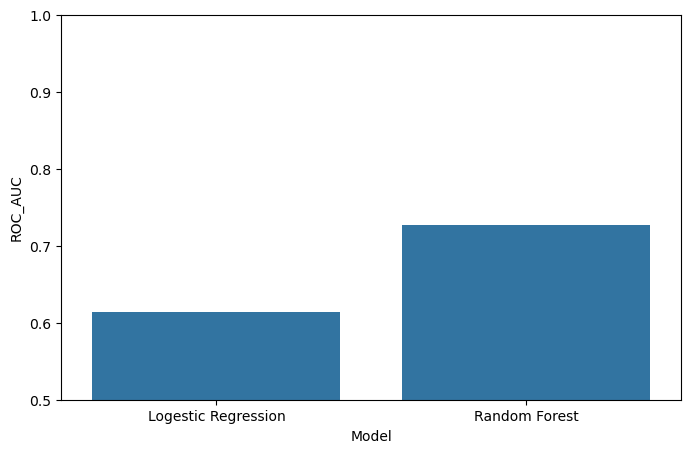

In [41]:
#Comparing models visually
plt.figure(figsize=(8,5))
sns.barplot(x="Model",y="ROC_AUC",data=model_comparsion)
plt.ylim(0.5,1.0)
plt.show()

## Best Model Selection

Based on the ROC-AUC score comparison, the Random Forest model outperformed
Logistic Regression. Random Forest was able to capture non-linear relationships
and interactions between features, making it more suitable for this banking
loan default prediction problem.

Therefore, Random Forest is recommended as the final model for production use.


## Challenges Faced and Solutions

### 1. Large Dataset and Memory Constraints
Some datasets such as installments_payments.csv were extremely large and caused
memory errors during loading. This was resolved by selective column loading and
efficient memory usage techniques.

### 2. Class Imbalance
The target variable was highly imbalanced with fewer defaulters. To address this,
class weights were used in model training and ROC-AUC was selected as the primary
evaluation metric.

### 3. Multiple Data Sources
The project involved multiple related datasets. Understanding unique identifiers
and proper aggregation strategies was necessary to avoid data duplication and
incorrect merges.

### 4. Missing Values
Several columns contained missing values. Numerical features were imputed using
median values, while categorical features were filled using mode to maintain
data consistency.


## Conclusion

This project successfully analyzed customer loan data and built predictive models
to identify loan defaulters. Exploratory Data Analysis revealed important patterns
related to income, loan amount, and employment status. Among the models evaluated,
Random Forest achieved the best performance based on ROC-AUC score and is recommended
for deployment in real-world banking environments.


In [42]:
import joblib
joblib.dump(rf_model,r"C:\Users\gopag\Downloads\Home_Loan_project_ML_DS\loan_default_model.pkl")
joblib.dump(x_train.columns,r"C:\Users\gopag\Downloads\Home_Loan_project_ML_DS\model/model_features.pkl")
print("model and feature list saved successfullay")

model and feature list saved successfullay
